<a href="https://colab.research.google.com/github/indrasn0wal/MLDLS2022/blob/main/Assignment_2_%26_3(Classification).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gender Classification


```
In this dataset we are given a dataset consisting the height, weight and Body Mass Index and we have to classify(or predict) the gender of them.
```



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded the file named "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving GenderPredict.csv to GenderPredict.csv
User uploaded the file named "GenderPredict.csv" with length 8318 bytes


In [ ]:
df= pd.read_csv('GenderPredict.csv')

In [ ]:
print(df.head())

   Gender  Height  Weight  Index
0    Male     174      96      4
1    Male     189      87      2
2  Female     185     110      4
3  Female     195     104      3
4    Male     149      61      3


In [ ]:
df['Gender'].value_counts()

Female    255
Male      245
Name: Gender, dtype: int64

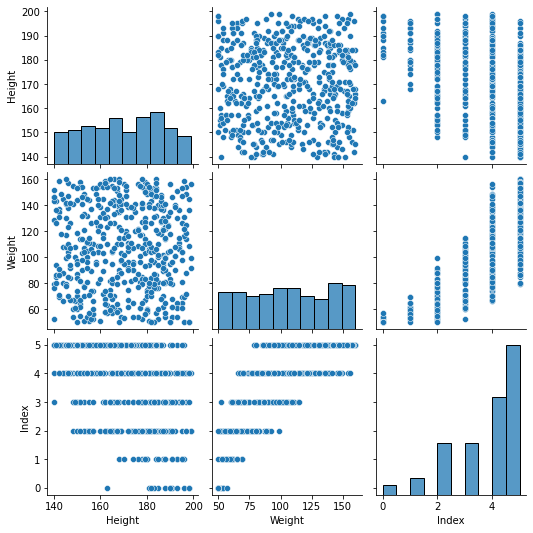

In [ ]:
sns.pairplot(df)

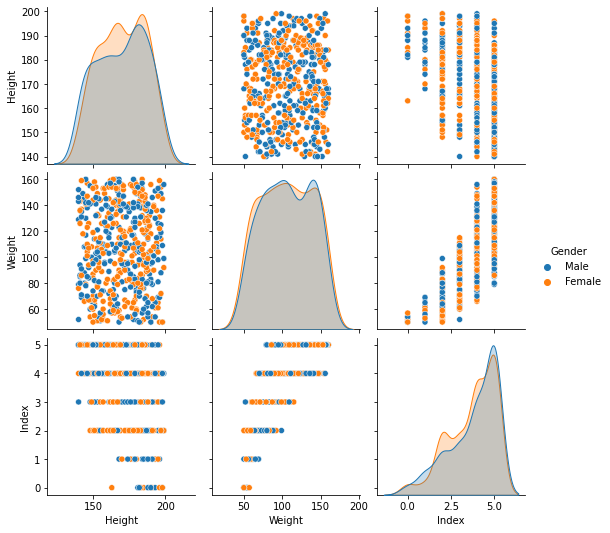

In [ ]:
sns.pairplot(df, hue= 'Gender')

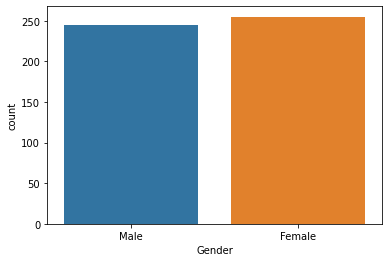

In [ ]:
sns.countplot(x = 'Gender', data = df)

In [ ]:
df.isnull().sum()

Gender    0
Height    0
Weight    0
Index     0
dtype: int64

In [ ]:
gender_mapping={'Male':0,'Female':1}
df["Gender"]=df["Gender"].map(gender_mapping)

In [ ]:
print(df.head())

   Gender  Height  Weight  Index
0       0     174      96      4
1       0     189      87      2
2       1     185     110      4
3       1     195     104      3
4       0     149      61      3


In [ ]:
X=df[["Height","Weight","Index"]].values
y=df[["Gender"]].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2,random_state=42)

**Implementing Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
model.fit(X_train, y_train.ravel())

LogisticRegression()

In [ ]:
model.score(X_test,y_test)

0.46

In [ ]:
predict = model.predict(X_test)
predict

array([0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0])

In [ ]:
from sklearn import metrics

In [ ]:
print(metrics.classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.42      0.53      0.47        45
           1       0.51      0.40      0.45        55

    accuracy                           0.46       100
   macro avg       0.47      0.47      0.46       100
weighted avg       0.47      0.46      0.46       100



In [ ]:
print(metrics.confusion_matrix(y_test,predict))

[[24 21]
 [33 22]]


**Implementing Decision Tree**

In [ ]:
from sklearn import tree

In [ ]:
decision= tree.DecisionTreeClassifier()

In [ ]:
decision.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
decision.score(X_test,y_test)

0.5

In [ ]:
predicted = model.predict(X_test)

In [ ]:
print(metrics.classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.42      0.53      0.47        45
           1       0.51      0.40      0.45        55

    accuracy                           0.46       100
   macro avg       0.47      0.47      0.46       100
weighted avg       0.47      0.46      0.46       100



In [ ]:
print(metrics.confusion_matrix(y_test,predict))

[[24 21]
 [33 22]]


# Task 2


```
# In this part we are going to remove the y(target variable) column and implement k-means(Unsupervised) on the dataset.
```



In [47]:
from sklearn.cluster import KMeans

In [48]:
df

,Height,Weight,Index
0,174,96,4
1,189,87,2
2,185,110,4
3,195,104,3
4,149,61,3
...,...,...,...
495,150,153,5
496,184,121,4
497,141,136,5
498,150,95,5


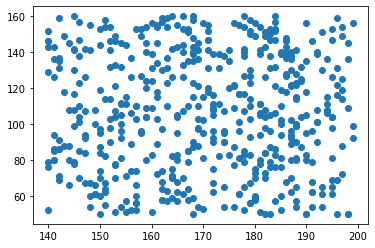

In [62]:
plt.scatter(df['Height'],df['Weight'])

In [57]:
k_rng = range(1,10)
sse=[]
for k in k_rng:
  km= KMeans(n_clusters=k)
  km.fit(df[["Height","Weight"]])
  sse.append(km.inertia_)

In [58]:
sse

[657074.4319999998,
 268809.66897633264,
 188189.5574409622,
 146577.99800300127,
 115362.12727379028,
 89027.22273266861,
 74476.46650377204,
 64342.85784710996,
 57071.04825937869]

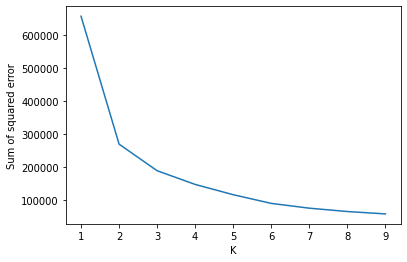

In [60]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [63]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [66]:
y_predicted = km.fit_predict(df[['Height','Weight']])
y_predicted

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 2, 2, 2, 0, 2,
       0, 2, 1, 1, 0, 1, 2, 2, 0, 1, 1, 2, 2, 2, 0, 1, 2, 1, 0, 0, 1, 0,
       2, 1, 0, 0, 1, 2, 2, 1, 0, 0, 0, 0, 0, 2, 1, 1, 1, 2, 1, 1, 2, 2,
       0, 1, 1, 2, 1, 0, 1, 1, 0, 2, 0, 0, 0, 1, 1, 2, 0, 0, 0, 1, 2, 0,
       0, 2, 2, 0, 0, 1, 0, 2, 1, 2, 1, 1, 2, 0, 2, 2, 2, 0, 2, 2, 0, 1,
       1, 2, 2, 0, 0, 1, 1, 0, 0, 2, 1, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 1,
       2, 0, 2, 2, 2, 0, 2, 2, 1, 1, 2, 0, 1, 0, 0, 2, 0, 0, 1, 1, 1, 2,
       0, 0, 1, 2, 0, 0, 0, 1, 0, 2, 0, 1, 0, 0, 1, 1, 2, 2, 2, 2, 2, 0,
       0, 0, 2, 0, 1, 0, 0, 1, 0, 1, 2, 1, 2, 0, 1, 0, 0, 2, 0, 0, 1, 0,
       2, 2, 1, 0, 0, 0, 2, 1, 0, 0, 0, 1, 1, 2, 2, 2, 1, 2, 0, 1, 2, 0,
       1, 2, 0, 2, 1, 2, 1, 0, 0, 2, 2, 1, 0, 1, 1, 1, 2, 2, 1, 0, 1, 1,
       1, 2, 1, 0, 0, 2, 0, 0, 1, 2, 2, 2, 2, 1, 0, 0, 2, 2, 0, 2, 2, 1,
       1, 1, 2, 2, 2, 1, 2, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 2, 0, 0, 2, 2,
       1, 2, 1, 0, 1, 0, 1, 1, 2, 2, 0, 1, 0, 1, 2,

In [77]:
df['Cluster']=y_predicted
df.head()

,Height,Weight,Index,Cluster
0,174,96,4,0
1,189,87,2,0
2,185,110,4,0
3,195,104,3,0
4,149,61,3,1


No handles with labels found to put in legend.


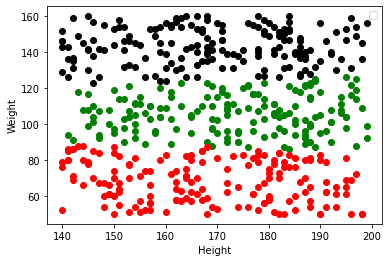

In [78]:
df1 = df[df.Cluster==0]
df2 = df[df.Cluster==1]
df3 = df[df.Cluster==2]
plt.scatter(df1.Height,df1['Weight'],color ='green')
plt.scatter(df2.Height,df2['Weight'],color ='red')
plt.scatter(df3.Height,df3['Weight'],color ='black')
plt.xlabel("Height")
plt.ylabel("Weight")
plt.legend()